In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
housing_df = pd.read_csv('housing_data.csv')
mushroom_df = pd.read_csv('mushroom_data.csv')
car_df = pd.read_csv('car_data.csv')

In [52]:
%matplotlib inline

In [53]:
housing_df.describe()

,sqft,sale_price,sale_price_pred
count,1460.000000,1460.000000,1460.000000
mean,1953.258904,180921.195890,180921.195891
std,763.074583,79442.502883,57244.924812
min,334.000000,34900.000000,59446.367310
25%,1456.000000,129975.000000,143617.439200
50%,1818.500000,163000.000000,170811.747200
75%,2302.000000,214000.000000,207083.327675
max,11286.000000,755000.000000,881052.053300


## Part 1 - Mathematical and Python Functions

In [54]:
#1a - Function to calculate RMSE 
def calculate_rmse(actual, predicted):
    """
    Calculate the Root Mean Square Error (RMSE) between actual and predicted values.
    
    Parameters:
    actual (list): List of actual values
    predicted (list): List of predicted values
    
    Returns:
    float: RMSE value
    """
    # Ensure both lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Lists must have the same length.")
    
    # Calculate the squared differences
    squared_diffs = [(pred - act) ** 2 for act, pred in zip(actual, predicted)]
    
    # Calculate the mean of the squared differences
    mean_squared_diff = sum(squared_diffs) / len(actual)
    
    # Calculate the square root of the mean squared difference
    rmse = math.sqrt(mean_squared_diff)
    
    return rmse


#1b - Calculate RMSE of sale_price & sale_price_pred
rmse_result = calculate_rmse(housing_df['sale_price'],housing_df['sale_price_pred'])
print("RMSE:", rmse_result)

RMSE: 55064.0688338987


In [55]:
#2a - Function to calculate MAE
def calculate_mae(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.
    
    Parameters:
    actual (list): List of actual values
    predicted (list): List of predicted values
    
    Returns:
    float: MAE value
    """
    # Ensure both lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Lists must have the same length.")
    
    # Calculate the absolute differences
    absolute_diffs = [abs(pred - act) for act, pred in zip(actual, predicted)]
    
    # Calculate the mean of the absolute differences
    mae = sum(absolute_diffs) / len(actual)
    
    return mae

#2b - Calculate MAE of sale_price & sale_price_pred
mae_result = calculate_mae(housing_df['sale_price'],housing_df['sale_price_pred'])
print("MAE:", mae_result)


MAE: 37438.68916270548


In [56]:
mushroom_df.describe()

,actual,predicted
count,8124,8124
unique,2,2
top,e,p
freq,4208,4566


In [57]:
#3a - Function to calculate accuracy
def calculate_accuracy(actual, predicted):
    """
    Calculate the accuracy between actual and predicted binary values.
    
    Parameters:
    actual (list): List of actual binary values
    predicted (list): List of predicted binary values
    
    Returns:
    float: Accuracy value
    """
    # Ensure both lists have the same length
    if len(actual) != len(predicted):
        raise ValueError("Lists must have the same length.")
    
    # Count the number of correct predictions
    correct_predictions = sum(act == pred for act, pred in zip(actual, predicted))
    
    # Calculate accuracy
    accuracy = correct_predictions / len(actual)
    
    return accuracy


#3b - Calculate accuracy of actual vs predicted using Mushroomdata.csv
accuracy_result = calculate_accuracy(mushroom_df['actual'],mushroom_df['predicted'])
print("Accuracy:", accuracy_result)


Accuracy: 0.8471196454948301


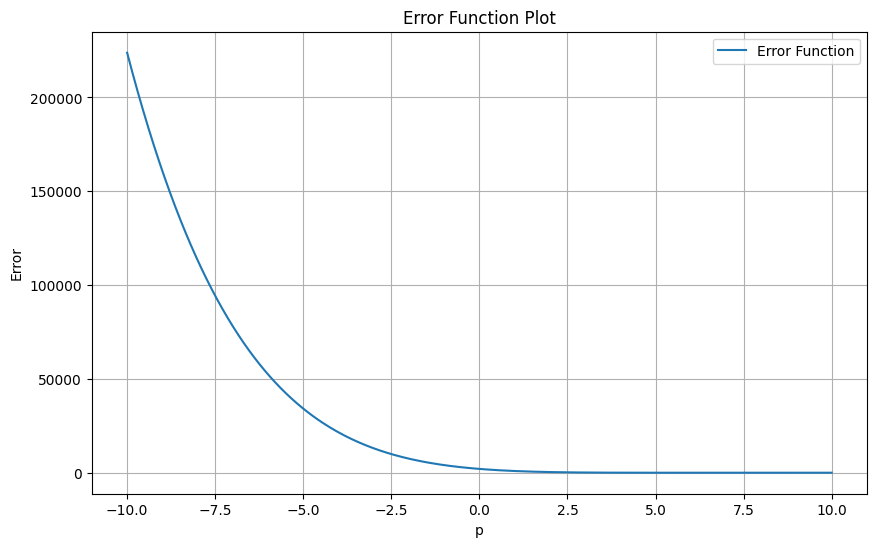

Value of p that minimizes the error: 5.187969924812029
Minimum error value: 1.752874138614061


In [58]:

#4a - Define the error function
def error_function(p):
    """
    Calculate the error function value for a given parameter p.
    
    Parameters:
    p (float): The parameter of the model
    
    Returns:
    float: Error value
    """
    error= 0.005 * p**6 - 0.27 * p**5 + 5.998 * p**4 - 69.919 * p**3 + 449.17 * p**2 - 1499.7 * p + 2028
    return error

# Generate values for p
p_values = np.linspace(-10, 10, 400)

# Calculate error values
error_values = [error_function(p) for p in p_values]

# Plot the error function
plt.figure(figsize=(10, 6))
plt.plot(p_values, error_values, label='Error Function')
plt.xlabel('p')
plt.ylabel('Error')
plt.title('Error Function Plot')
plt.legend()
plt.grid(True)
plt.show()

# Estimate value of p that minimizes the error
min_error_index = np.argmin(error_values)
min_p_value = p_values[min_error_index]

# Estimate the minimum error
min_error_value = error_values[min_error_index]

print("Value of p that minimizes the error:", min_p_value)
print("Minimum error value:", min_error_value)


## Part 2 - Mathematical and Python Functions Scatterplots and Linear Regression

For this assignment, you will be using the data set car data.csv. This data set is a modified version of the data
set imports-85.data from https://archive.ics.uci.edu/ml/datasets/automobile. There are two columns in this data set.
One is the weight of the vehicle in pounds, and the other is the highway miles per gallon.

In [59]:
car_df.describe()

,weight,hwy_mpg
count,205.000000,205.000000
mean,2555.565854,30.751220
std,520.680204,6.886443
min,1488.000000,16.000000
25%,2145.000000,25.000000
50%,2414.000000,30.000000
75%,2935.000000,34.000000
max,4066.000000,54.000000


Dataset Columns: Index(['weight', 'hwy_mpg'], dtype='object')


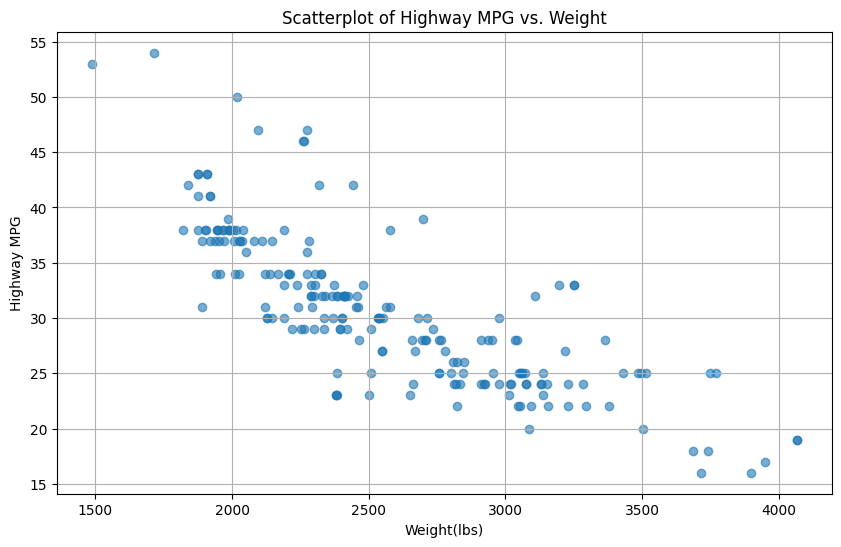

In [60]:
#1 - Make a scatterplot of the highway miles per gallon (y-axis) versus the weight (x-axis).

# Check the column names to ensure you have the correct columns
print("Dataset Columns:", car_df.columns)

# Scatterplot of highway miles per gallon vs. weight
plt.figure(figsize=(10, 6))
plt.scatter(car_df['weight'], car_df['hwy_mpg'], alpha=0.6)
plt.title('Scatterplot of Highway MPG vs. Weight')
plt.xlabel('Weight(lbs)')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()


#2. Based on your plot, what is the general trend of how highway miles per gallon varies with the weight?

**There is a Negative Linear trend between Highway MPG and weight.**

3. If you were to build a linear model using this data to predict highway miles per gallon from weight, would you
expect the slope to be positive or negative? Explain.

**The slope would be negative based on the scatterplot. There are a few outliers, but most data points follow a negative linear trend.**

4. If the slope of a linear model predicting highway miles per gallon from the weight, interpret the meaning of the 
slope being −0.05.

**A slope of -.05 would indicate the following: For every .05 pounds a given vehicle weighs the Highway MPG decreases by 1.**



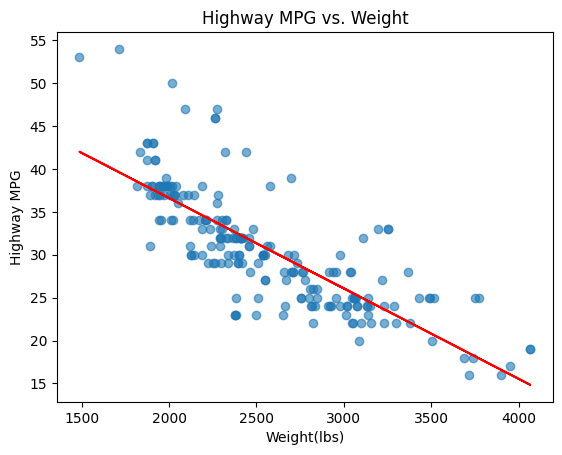

In [61]:
#5. Write code to add a line to the graph you made in problem (1). Adjust the slope and y-intercept of this line
#until you think you have found the line that best fits the data. Record the slope and y-intercept.
plt.title('Highway MPG vs. Weight')
plt.xlabel('Weight(lbs)')
plt.ylabel('Highway MPG')
plt.scatter(car_df.weight, car_df.hwy_mpg, alpha=0.6)

slope, intercept = np.polyfit(car_df['weight'], car_df['hwy_mpg'], 1)
best_fit_line = slope * car_df['weight'] + intercept
plt.plot(car_df['weight'], best_fit_line, color='red', label='Best fit line')

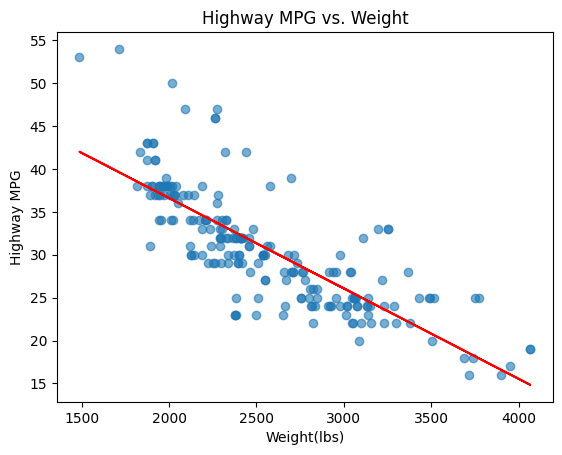

In [62]:
#6. Use Python to find the best-fit line. The Scikit-learn package is a good choice to use for this.
plt.title('Highway MPG vs. Weight')
plt.xlabel('Weight(lbs)')
plt.ylabel('Highway MPG')
plt.scatter(car_df.weight, car_df.hwy_mpg, alpha=0.6)

slope, intercept = np.polyfit(car_df['weight'], car_df['hwy_mpg'], 1)
best_fit_line = slope * car_df['weight'] + intercept
plt.plot(car_df['weight'], best_fit_line, color='red', label='Best fit line')

In [63]:
#7. Find the root mean squared error (RMSE) of the prediction line you found in problem (4) and the actual best-fit
#line found in problem (5). How do these compare?
calculate_rmse(best_fit_line, best_fit_line)

0.0

The predicted highway mpg for a car that weighs 3200 pounds is: 23.954271285842076


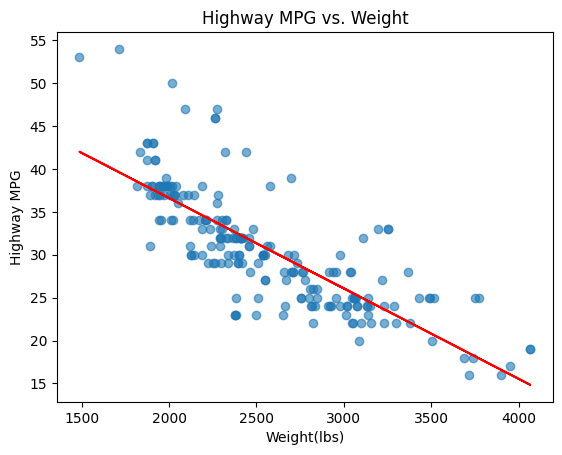

In [64]:
#8. Use the best-fit line in problem (5) to predict the highway mpg of a car that weighs 3200 pounds.
plt.title('Highway MPG vs. Weight')
plt.xlabel('Weight(lbs)')
plt.ylabel('Highway MPG')
plt.scatter(car_df.weight, car_df.hwy_mpg, alpha=0.6)
#Prediction 
slope, intercept = np.polyfit(car_df['weight'], car_df['hwy_mpg'], 1)
weight = 3200
predicted_highway_mpg = slope * weight + intercept

#best fit line
best_fit_line = slope * car_df['weight'] + intercept
plt.plot(car_df['weight'], best_fit_line, color='red', label='Best fit line')
print(f'The predicted highway mpg for a car that weighs 3200 pounds is: {predicted_highway_mpg}')

